In [1]:
import shutil                          
import glob                          
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import os
import pandas as pd
import sklearn
from IPython.display import display

In [5]:
from RNASeq_prep_n_RFOptimization import *
from genomic_classifiers_n_AUC_plot import *

In [27]:
root_path = "######################"
met_path = root_path + "/genomic_blca/genomic_blca_met"
met_content = next(os.walk(met_path))[1]  
try:
    met_content.remove(".ipynb_checkpoints")  
except:
    pass
#print(met_content)
print(len(met_content))

In [8]:
# Create a list containing path to all "metastasis" rna_seq files.
met_list = []
for barc_folder in met_content:
    barc_folder_path = met_path + "/" + barc_folder
    barc_folder_content = next(os.walk(barc_folder_path))[1]
    met_folder = barc_folder_content[0]
    met_folder_path = barc_folder_path + "/" + met_folder
    met_extension = "/*.tsv"
    rna_seq_files = glob.glob(met_folder_path + met_extension)
    met_list.append(rna_seq_files[0])
    
#print(met_list)
print(len(met_list))

80


In [9]:
no_met_path = root_path + "/genomic_blca/genomic_blca_no-met"
no_met_content = next(os.walk(no_met_path))[1] 
try:
    no_met_content.remove(".ipynb_checkpoints") 
except:
    pass
#print(no_met_content)
print(len(no_met_content))

80


In [10]:
# Create a list containing path to all "no-metastasis" rna_seq files.
no_met_list = []
for barc_folder in no_met_content:
    barc_folder_path = no_met_path + "/" + barc_folder
    barc_folder_content = next(os.walk(barc_folder_path))[1]
    no_met_folder = barc_folder_content[0]
    no_met_folder_path = barc_folder_path + "/" + no_met_folder
    no_met_extension = "/*.tsv"
    rna_seq_files = glob.glob(no_met_folder_path + no_met_extension)   
    no_met_list.append(rna_seq_files[0])
    
#print(no_met_list)
print(len(no_met_list))

80


## Predict Metastasis VS No Metastasis Using ML selected Genes

### Get preprocessed df without variance count filter

In [12]:
# Multiple categories data pre-processing pipeline
# Combine tpm_objs of all categories of samples cosidered into a sigle list before further pre-processing
met_tpm_objs = all_tpm_objs_list(met_list, metastasis=True)
met_objs = met_tpm_objs[0]
met_labels = met_tpm_objs[1]
no_met_tpm_objs = all_tpm_objs_list(no_met_list)
no_met_objs = no_met_tpm_objs[0]
no_met_labels = no_met_tpm_objs[1]
all_cat_tpm_objs = met_objs + no_met_objs


# Merge each rna-seq df into one full df
all_cat_full_df = merge_dataframe(all_cat_tpm_objs)
all_cat_full_df

# Carry out further pre-processing
prep_df = further_preprocessing(all_cat_full_df, save_filename_dot_csv = "preprocessed_novariance_log_BLCA_tpm.csv", apply_var_filter = False)
prep_df.shape
#prep_df.head()

There are 0 NaN values in dataframe.
Samples values converted to float32
There are 0 NaN values in dataframe after log transformation
There are 463629 Inf values in data after log transformation
0
NaN and Inf values replaced with 0.
Log transformation complete.


/.autofs/tools/spack/var/spack/environments/tumor-22092001/.spack-env/view/lib/python3.8/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)


Genes with 0 value in greter than 80% of samples removed.
Dataframe transposed: Genes are now arranged in columns, and samples in rows
Would you like to save transposed, preprocessed full fpkm dataframe? (y/n)n


(160, 18201)

In [13]:
# Create a "metastasis" label column for each category (metastasis / no metastasis)
prep_df.loc[met_labels, "metastasis"] = 1
prep_df.loc[no_met_labels, "metastasis"] = 0
# Convert "metastasis" column to type int
prep_df["metastasis"] = prep_df["metastasis"].astype("int")
#prep_df.head(20)

### Use ML Genes First

In [15]:
# Load already saved RF top BLCA genes
RF_top_genes = pd.read_csv(root_path + "/top_genes_BLCA_tpm.csv")
ML_top = list(RF_top_genes["gene_name"])

In [16]:
######   TPM results
# Select top 30, 25, 20, 15, 10, 5, 3, 2, 1 for prediction, and record results
genes_num_list = [30, 25, 20, 15, 10, 5, 3, 2, 1]
blca_ml_res = results(prep_df, ML_top, genes_num_list)
blca_ml_res

Now getting results for 30 genes...
(160, 30)
(160,)
X_train samples number: 120, Y_train samples number: 120
X_test samples number: 40, Y_test samples number: 40
Now getting results for 25 genes...
(160, 25)
(160,)
X_train samples number: 120, Y_train samples number: 120
X_test samples number: 40, Y_test samples number: 40
Now getting results for 20 genes...
(160, 20)
(160,)
X_train samples number: 120, Y_train samples number: 120
X_test samples number: 40, Y_test samples number: 40
Now getting results for 15 genes...
(160, 15)
(160,)
X_train samples number: 120, Y_train samples number: 120
X_test samples number: 40, Y_test samples number: 40
Now getting results for 10 genes...
(160, 10)
(160,)
X_train samples number: 120, Y_train samples number: 120
X_test samples number: 40, Y_test samples number: 40
Now getting results for 5 genes...
(160, 5)
(160,)
X_train samples number: 120, Y_train samples number: 120
X_test samples number: 40, Y_test samples number: 40
Now getting results for 

,no_of_genes,instance_acc_RF,RF_cv_acc_mean,RF_cv_acc_std,RF_cv_f1_mean,RF_cv_f1_std,RF_cv_auc_mean,RF_cv_auc_std,instance_acc_SVM,SVM_cv_acc_mean,...,SVM_cv_f1_std,SVM_cv_auc_mean,SVM_cv_auc_std,instance_acc_KNN,KNN_cv_acc_mean,KNN_cv_acc_std,KNN_cv_f1_mean,KNN_cv_f1_std,KNN_cv_auc_mean,KNN_cv_auc_std
0,30,0.775,0.810,0.046368,0.813472,0.038879,0.896493,0.010231,0.700,0.765,...,0.061801,0.871338,0.052489,0.750,0.715,0.037417,0.749205,0.052301,0.855204,0.057556
1,25,0.750,0.790,0.060415,0.785346,0.068834,0.897689,0.052370,0.700,0.750,...,0.051057,0.864394,0.059117,0.625,0.660,0.033912,0.706452,0.042059,0.811517,0.064926
2,20,0.775,0.790,0.012247,0.788911,0.012853,0.899613,0.034947,0.650,0.725,...,0.057573,0.830682,0.062039,0.675,0.670,0.062048,0.702112,0.066386,0.802578,0.072671
3,15,0.700,0.760,0.051478,0.746367,0.035874,0.865289,0.061726,0.675,0.695,...,0.030384,0.806061,0.064877,0.700,0.690,0.020000,0.721525,0.022662,0.816284,0.050826
4,10,0.825,0.755,0.040000,0.742651,0.046212,0.851671,0.038965,0.700,0.690,...,0.058848,0.797538,0.055595,0.800,0.700,0.057009,0.726269,0.064043,0.786139,0.053568
5,5,0.700,0.745,0.060000,0.717909,0.067608,0.796429,0.040715,0.625,0.655,...,0.043331,0.775694,0.047560,0.600,0.645,0.048477,0.658627,0.053046,0.747243,0.032103
6,3,0.625,0.695,0.065955,0.676832,0.051871,0.736149,0.061404,0.575,0.630,...,0.014217,0.693024,0.082258,0.700,0.685,0.068191,0.661542,0.073076,0.727769,0.086491
7,2,0.650,0.660,0.048990,0.626316,0.042655,0.643277,0.057431,0.575,0.635,...,0.022020,0.685781,0.080524,0.675,0.685,0.073485,0.654563,0.052143,0.719119,0.077590
8,1,0.425,0.540,0.066332,0.507812,0.125698,0.570666,0.090946,0.475,0.500,...,0.060022,0.558035,0.096954,0.650,0.625,0.083666,0.557910,0.123729,0.601758,0.023806


In [22]:
# Save BLCA ML genes prediction results
blca_ml_res.to_csv("res_ml_BLCA_tpm.csv")

### Use selected number of "top" ML genes to generate AUROC plot using a selected model

In [17]:
# Load already saved RF top PAAD genes
RF_top_genes = pd.read_csv(root_path + "/top_genes_BLCA_tpm.csv")  
ML_top = list(RF_top_genes["gene_name"])
# Select just top 15 genes here for single 5 fold cross-validation prediction and curve. 
sel_ML = ML_top[:15]       

In [18]:
# Seperate independent variables
X = prep_df.loc[ : , sel_ML]
print(X.shape)
# Extract dependent variable
Y = prep_df["metastasis"].astype("int")
print(Y.shape)

(160, 15)
(160,)


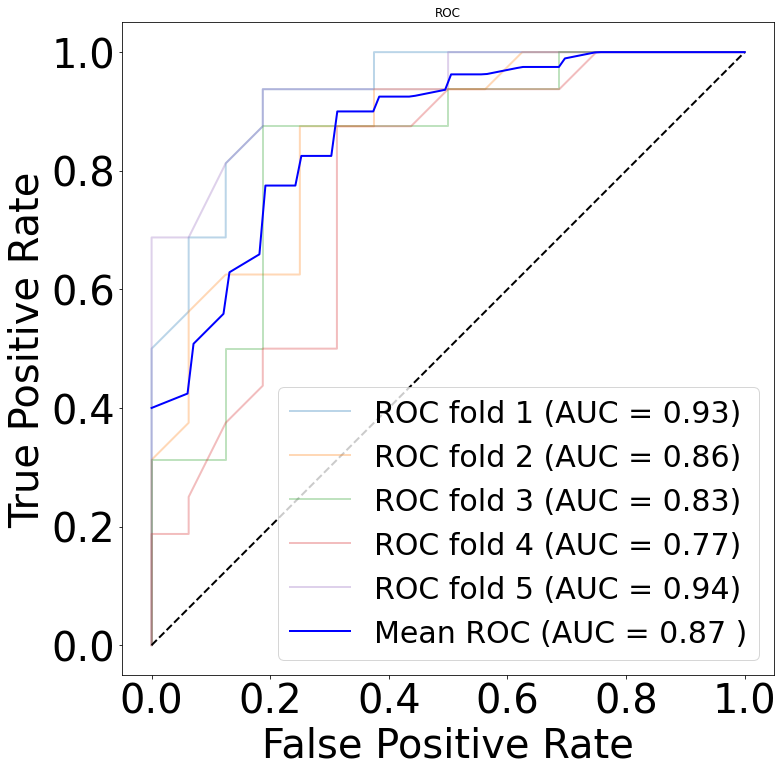

Would you like to save auroc plot for 5 fold cross-validation? (y/n) 
y
Please enter filename to save with... add .png at the end. 
BLCA_AUROC_CV_PLOT_tpm.png
BLCA_AUROC_CV_PLOT_tpm.png saved to current working directory.


In [19]:
# Define model of choice
rf_model = RandomForestClassifier(n_estimators=70, random_state = 10)
# Call function to create AUROC plot
blca_auroc = cv_roc_plot(rf_model, 5, X, Y)

### Use BLCA DESeq Set of Genes

In [20]:
# path_to_file = DGE result from DESeq2
def preprocess_deseq2_res(path_to_file):
    # Load DESeq2 results
    paad_deseq = pd.read_csv(path_to_file)   
    # All columns are currently in object format
    # Convert appropraite columns to float
    convert_dict = {'baseMean': float,
                    'log2FoldChange': float,
                    'lfcSE': float,
                    'stat': float,
                    'pvalue': float,
                    'padj': float
                    }

    paad_deseq = paad_deseq.astype(convert_dict)
    # Rename "Unnamed: 0" column to "gene_name"
    paad_deseq = paad_deseq.rename(columns = {"Unnamed: 0": "gene_name"})

    # Subset by P.adjusted value < 0.05
    paad_padj005 = paad_deseq[paad_deseq["padj"] < 0.05]
    
    return paad_padj005

In [21]:
paadj005 = preprocess_deseq2_res(root_path + "/deseq2_padj0.05_blca_results.csv")
# Order by P.adj from lowest to highest
paadj005 = paadj005.sort_values(by = "padj", ascending = True)
deseq_genes = list(paadj005.iloc[0 : , 0])

In [22]:
# Select top 30, 25, 20, 15, 10, 5, 3, 2, 1 for prediction, and record results
genes_num_list = [30, 25, 20, 15, 10, 5, 3, 2, 1]
blca_deseq_res = results(prep_df, deseq_genes, genes_num_list)
blca_deseq_res

Now getting results for 30 genes...
(160, 30)
(160,)
X_train samples number: 120, Y_train samples number: 120
X_test samples number: 40, Y_test samples number: 40
Now getting results for 25 genes...
(160, 25)
(160,)
X_train samples number: 120, Y_train samples number: 120
X_test samples number: 40, Y_test samples number: 40
Now getting results for 20 genes...
(160, 20)
(160,)
X_train samples number: 120, Y_train samples number: 120
X_test samples number: 40, Y_test samples number: 40
Now getting results for 15 genes...
(160, 15)
(160,)
X_train samples number: 120, Y_train samples number: 120
X_test samples number: 40, Y_test samples number: 40
Now getting results for 10 genes...
(160, 10)
(160,)
X_train samples number: 120, Y_train samples number: 120
X_test samples number: 40, Y_test samples number: 40
Now getting results for 5 genes...
(160, 5)
(160,)
X_train samples number: 120, Y_train samples number: 120
X_test samples number: 40, Y_test samples number: 40
Now getting results for 

,no_of_genes,instance_acc_RF,RF_cv_acc_mean,RF_cv_acc_std,RF_cv_f1_mean,RF_cv_f1_std,RF_cv_auc_mean,RF_cv_auc_std,instance_acc_SVM,SVM_cv_acc_mean,...,SVM_cv_f1_std,SVM_cv_auc_mean,SVM_cv_auc_std,instance_acc_KNN,KNN_cv_acc_mean,KNN_cv_acc_std,KNN_cv_f1_mean,KNN_cv_f1_std,KNN_cv_auc_mean,KNN_cv_auc_std
0,30,0.700,0.630,0.073144,0.601300,0.102179,0.627993,0.036967,0.600,0.620,...,0.040798,0.656064,0.041531,0.650,0.560,0.084558,0.607703,0.057671,0.616477,0.065581
1,25,0.650,0.600,0.061237,0.568122,0.089112,0.616920,0.082267,0.525,0.595,...,0.057136,0.651664,0.057325,0.500,0.540,0.033912,0.567349,0.028744,0.645435,0.061548
2,20,0.650,0.610,0.095656,0.579201,0.121642,0.587545,0.120408,0.625,0.635,...,0.041724,0.657312,0.037148,0.725,0.610,0.064420,0.565278,0.096439,0.654256,0.083552
3,15,0.650,0.605,0.081240,0.572704,0.127651,0.591295,0.090971,0.675,0.620,...,0.075228,0.623281,0.049095,0.675,0.595,0.048477,0.583488,0.075393,0.650181,0.063900
4,10,0.675,0.575,0.085147,0.531452,0.075822,0.583092,0.102263,0.725,0.575,...,0.118258,0.609826,0.054654,0.600,0.565,0.030000,0.569819,0.042239,0.616105,0.058000
5,5,0.525,0.500,0.027386,0.454045,0.048110,0.502076,0.102330,0.625,0.570,...,0.081829,0.618595,0.087500,0.500,0.510,0.071764,0.355342,0.086217,0.486003,0.072000
6,3,0.475,0.480,0.040000,0.463944,0.054930,0.534568,0.068983,0.600,0.525,...,0.095412,0.470311,0.146917,0.550,0.565,0.056125,0.438382,0.069631,0.578834,0.118763
7,2,0.500,0.470,0.040000,0.439671,0.050429,0.498242,0.078656,0.525,0.480,...,0.112796,0.489874,0.144487,0.575,0.515,0.040620,0.391348,0.085833,0.569706,0.058328
8,1,0.525,0.455,0.048477,0.475395,0.088297,0.471138,0.072419,0.575,0.495,...,0.121379,0.495705,0.125126,0.500,0.470,0.029155,0.337887,0.084948,0.542652,0.113848


In [45]:
# Save HNSC DESeq2 genes prediction results
blca_deseq_res.to_csv("res_deseq_BLCA_tpm.csv")

### Use selected number of "top" DESeq2 genes to generate AUROC plot using a selected model

In [23]:
paadj005 = preprocess_deseq2_res(root_path + "/deseq2_padj0.05_blca_results.csv")
# Order by P.adj from lowest to highest
paadj005 = paadj005.sort_values(by = "padj", ascending = True)
# Select just top 15 genes here for single 5 fold cross-validation prediction and curve. 
sel_deseq = list(paadj005.iloc[0:15,0]) 

In [24]:
# Seperate independent variables
X = prep_df.loc[ : , sel_deseq]
print(X.shape)
# Extract dependent variable
Y = prep_df["metastasis"].astype("int")
print(Y.shape)
#print(Y_prep.head())

(160, 15)
(160,)


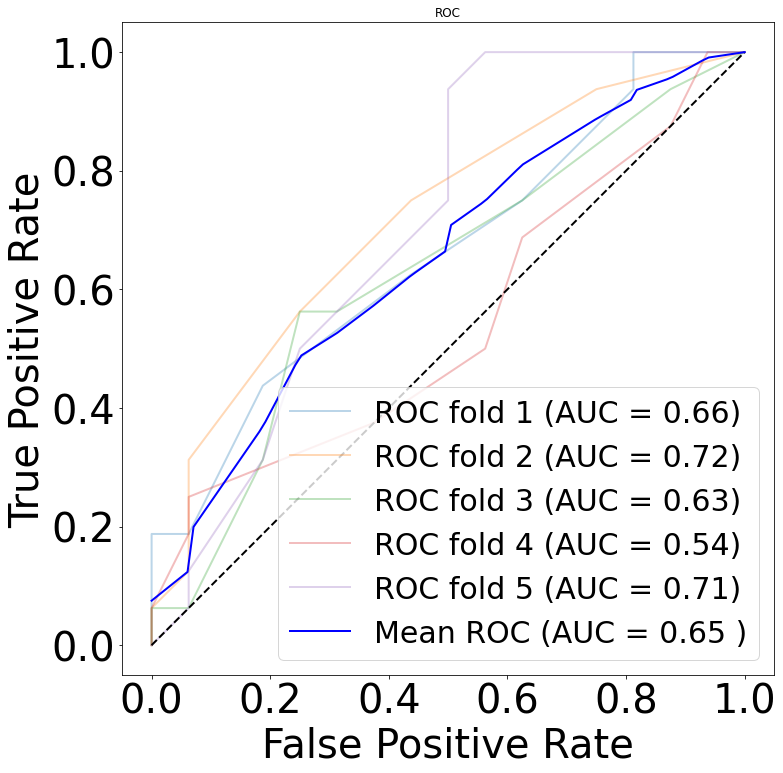

Would you like to save auroc plot for 5 fold cross-validation? (y/n) 
y
Please enter filename to save with... add .png at the end. 
BLCA_DESeq_AUROC_CV_PLOT_tpm.png
BLCA_DESeq_AUROC_CV_PLOT_tpm.png saved to current working directory.


In [25]:
# Define model of choice
knn_cv_model = KNeighborsClassifier(n_neighbors = 19)
# Call function to create AUROC plot
blca_deseq_auroc = cv_roc_plot(knn_cv_model, 5, X, Y)

### Use ML Genes from ALL3

In [26]:
# Load already saved RF top ALL3 genes
all3_RF_top_genes = pd.read_csv("top_genes_3_tpm.csv")
all3_ML_top = list(all3_RF_top_genes["gene_name"])

In [27]:
######   TPM results
# Select top 30, 25, 20, 15, 10, 5, 3, 2, 1 for prediction, and record results
genes_num_list = [30, 25, 20, 15, 10, 5, 3, 2, 1]
blca_all3_ml_res = results(prep_df, all3_ML_top, genes_num_list)
blca_all3_ml_res

Now getting results for 30 genes...
(160, 30)
(160,)
X_train samples number: 120, Y_train samples number: 120
X_test samples number: 40, Y_test samples number: 40


/tmp/ipykernel_13555/4183081011.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_13555/4183081011.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_13555/4183081011.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_13555/4183081011.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_13555/4183081011.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_13555/4183081011.py:34: DeprecationWarni

Now getting results for 25 genes...
(160, 25)
(160,)
X_train samples number: 120, Y_train samples number: 120
X_test samples number: 40, Y_test samples number: 40


/tmp/ipykernel_13555/4183081011.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_13555/4183081011.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_13555/4183081011.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_13555/4183081011.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_13555/4183081011.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_13555/4183081011.py:34: DeprecationWarni

Now getting results for 20 genes...
(160, 20)
(160,)
X_train samples number: 120, Y_train samples number: 120
X_test samples number: 40, Y_test samples number: 40


/tmp/ipykernel_13555/4183081011.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_13555/4183081011.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_13555/4183081011.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_13555/4183081011.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_13555/4183081011.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_13555/4183081011.py:34: DeprecationWarni

Now getting results for 15 genes...
(160, 15)
(160,)
X_train samples number: 120, Y_train samples number: 120
X_test samples number: 40, Y_test samples number: 40


/tmp/ipykernel_13555/4183081011.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_13555/4183081011.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_13555/4183081011.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_13555/4183081011.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_13555/4183081011.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_13555/4183081011.py:34: DeprecationWarni

Now getting results for 10 genes...
(160, 10)
(160,)
X_train samples number: 120, Y_train samples number: 120
X_test samples number: 40, Y_test samples number: 40


/tmp/ipykernel_13555/4183081011.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_13555/4183081011.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_13555/4183081011.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_13555/4183081011.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_13555/4183081011.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_13555/4183081011.py:34: DeprecationWarni

Now getting results for 5 genes...
(160, 5)
(160,)
X_train samples number: 120, Y_train samples number: 120
X_test samples number: 40, Y_test samples number: 40


/tmp/ipykernel_13555/4183081011.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_13555/4183081011.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_13555/4183081011.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_13555/4183081011.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_13555/4183081011.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_13555/4183081011.py:34: DeprecationWarni

Now getting results for 3 genes...
(160, 3)
(160,)
X_train samples number: 120, Y_train samples number: 120
X_test samples number: 40, Y_test samples number: 40


/tmp/ipykernel_13555/4183081011.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_13555/4183081011.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_13555/4183081011.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_13555/4183081011.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_13555/4183081011.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_13555/4183081011.py:34: DeprecationWarni

Now getting results for 2 genes...
(160, 2)
(160,)
X_train samples number: 120, Y_train samples number: 120
X_test samples number: 40, Y_test samples number: 40


/tmp/ipykernel_13555/4183081011.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_13555/4183081011.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_13555/4183081011.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_13555/4183081011.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_13555/4183081011.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_13555/4183081011.py:34: DeprecationWarni

Now getting results for 1 genes...
(160, 1)
(160,)
X_train samples number: 120, Y_train samples number: 120
X_test samples number: 40, Y_test samples number: 40


/tmp/ipykernel_13555/4183081011.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_13555/4183081011.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_13555/4183081011.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_13555/4183081011.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_13555/4183081011.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_13555/4183081011.py:34: DeprecationWarni

,no_of_genes,instance_acc_RF,RF_cv_acc_mean,RF_cv_acc_std,RF_cv_f1_mean,RF_cv_f1_std,RF_cv_auc_mean,RF_cv_auc_std,instance_acc_SVM,SVM_cv_acc_mean,...,SVM_cv_f1_std,SVM_cv_auc_mean,SVM_cv_auc_std,instance_acc_KNN,KNN_cv_acc_mean,KNN_cv_acc_std,KNN_cv_f1_mean,KNN_cv_f1_std,KNN_cv_auc_mean,KNN_cv_auc_std
0,30,0.750,0.660,0.075166,0.643493,0.085649,0.809018,0.014564,0.775,0.685,...,0.098363,0.821465,0.030519,0.775,0.695,0.076485,0.716829,0.082837,0.800136,0.081102
1,25,0.725,0.635,0.081548,0.598554,0.112588,0.771719,0.035600,0.775,0.695,...,0.056089,0.844957,0.027243,0.750,0.725,0.027386,0.730691,0.032703,0.831743,0.064565
2,20,0.700,0.640,0.070000,0.583398,0.128379,0.775274,0.052028,0.700,0.670,...,0.059469,0.822412,0.032250,0.725,0.645,0.048477,0.647414,0.061263,0.810065,0.060935
3,15,0.600,0.610,0.046368,0.586813,0.057077,0.711531,0.063716,0.675,0.615,...,0.095780,0.762306,0.027388,0.725,0.630,0.062048,0.614941,0.076740,0.735288,0.077326
4,10,0.650,0.585,0.046368,0.535694,0.095509,0.675056,0.083127,0.625,0.625,...,0.078901,0.704408,0.065149,0.700,0.620,0.050990,0.604352,0.095933,0.693193,0.068577
5,5,0.675,0.625,0.031623,0.601546,0.068485,0.654016,0.062088,0.650,0.590,...,0.074702,0.687070,0.059708,0.650,0.575,0.057009,0.504000,0.089472,0.655019,0.061781
6,3,0.500,0.570,0.036742,0.565379,0.029174,0.644611,0.064841,0.600,0.570,...,0.091501,0.673721,0.037353,0.625,0.575,0.027386,0.551161,0.055706,0.634108,0.048830
7,2,0.550,0.515,0.043589,0.479947,0.048314,0.547863,0.098872,0.575,0.515,...,0.114079,0.476578,0.129589,0.525,0.475,0.075829,0.438035,0.111793,0.517352,0.111212
8,1,0.525,0.460,0.071764,0.507724,0.127308,0.548779,0.064324,0.575,0.520,...,0.113557,0.418558,0.074715,0.550,0.465,0.076811,0.380147,0.138623,0.583925,0.089187


In [36]:
# Save HNSC ML genes prediction results
blca_all3_ml_res.to_csv("res_ml_BLCA_ALL3_tpm.csv")

### Use selected number of "top" ALL3 genes to generate AUROC plot using a selected model

In [40]:
# Load already saved RF top ALL3 genes
all3_RF_top_genes = pd.read_csv("top_genes_3_tpm.csv")
all3_ML_top = list(all3_RF_top_genes["gene_name"])
# Select just top 15 genes here for single 5 fold cross-validation prediction and curve. 
sel_all3_ML = all3_ML_top[:15]    

In [41]:
# Seperate independent variables
X = prep_df.loc[ : , sel_all3_ML]
print(X.shape)
# Extract dependent variable
Y = prep_df["metastasis"].astype("int")
print(Y.shape)

(160, 15)
(160,)


/tmp/ipykernel_7067/3325406614.py:46: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_7067/3325406614.py:46: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_7067/3325406614.py:46: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_7067/3325406614.py:46: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_7067/3325406614.py:46: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


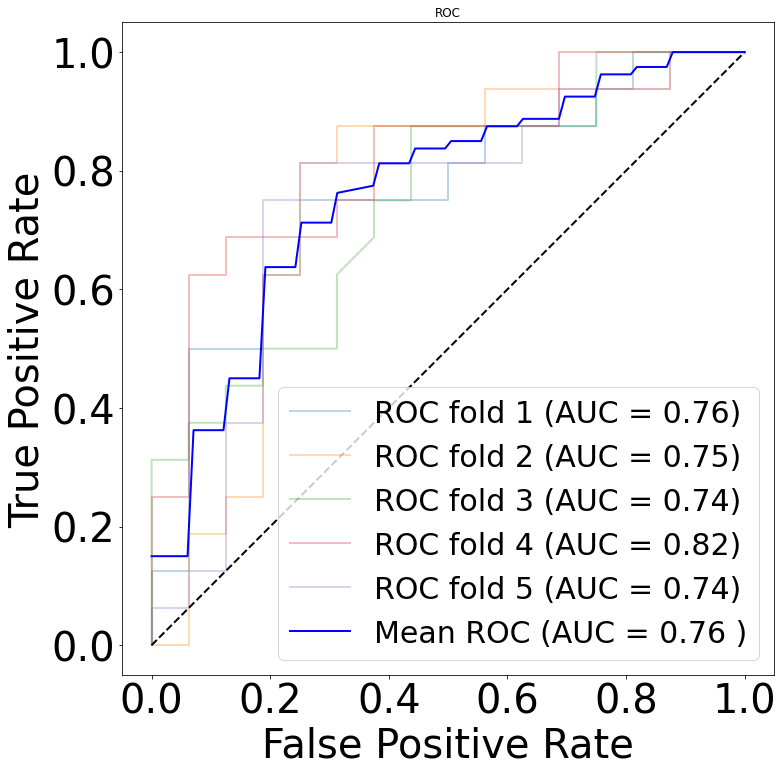

Would you like to save auroc plot for 5 fold cross-validation? (y/n) 
y
Please enter filename to save with... add .png at the end. 
BLCA_AUROC_ALL3_CV_PLOT_tpm.png
BLCA_AUROC_ALL3_CV_PLOT_tpm.png saved to current working directory.


In [42]:
# Define model of choice
svm_linear_model = SVC(kernel = 'linear', C = 1, probability= True, random_state = 10)
# Call function to create AUROC plot
blca_all3_ml_auroc = cv_roc_plot(svm_linear_model, 5, X, Y)

### Use Union (BLCA + PAAD + HNSC) ML Genes 

In [43]:
# Load already saved RF top BLCA genes
blca_RF_top_genes = pd.read_csv("top_genes_BLCA_tpm.csv")
blca_ML_top = list(blca_RF_top_genes["gene_name"])
# Select just top 15 genes here for single 5 fold cross-validation prediction and curve.
blca_sel_ML = blca_ML_top[:15]

# Load already saved RF top PAAD genes
paad_RF_top_genes = pd.read_csv("top_genes_PAAD_tpm.csv")            
paad_ML_top = list(paad_RF_top_genes["gene_name"])
# Select just top 15 genes here for single 5 fold cross-validation prediction and curve. 
paad_sel_ML = paad_ML_top[:15]             


# Load already saved RF top HNSC genes
hnsc_RF_top_genes = pd.read_csv("top_genes_HNC_tpm.csv")            
hnsc_ML_top = list(hnsc_RF_top_genes["gene_name"])
# Select just top 15 genes here for single 5 fold cross-validation prediction and curve. 
hnsc_sel_ML = hnsc_ML_top[:15]


comb = blca_sel_ML + paad_sel_ML + hnsc_sel_ML
#comb

In [44]:
# Seperate independent variables
X = prep_df.loc[ : , comb]
print(X.shape)
# Extract dependent variable
Y = prep_df["metastasis"].astype("int")
print(Y.shape)
#print(Y_prep.head())

(160, 45)
(160,)


In [45]:
# Cross-validation Genomic RF
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
#n_samples = X.shape[0]

union_RF = RandomForestClassifier(n_estimators=70, random_state = 10)
cv = ShuffleSplit(n_splits=5, test_size=0.25, random_state=10)
# Accuracy score on each cross validation set
RF_cv_scores = cross_val_score(union_RF, X, Y, cv=cv)
# F1 score on each cross validation set
RF_cv_f1 = cross_val_score(union_RF, X, Y, scoring = "f1", cv=cv)
# AUC score on each cross validation set
RF_cv_auc = cv_roc(union_RF, 5, X, Y)

print("RF_acc_scores", RF_cv_scores)
print("RF_f1_score", RF_cv_f1)
print("RF_auc_scores", RF_cv_auc[0])
print("RF_cv:", RF_cv_scores.mean())
print("RF_std:", RF_cv_scores.std())
print("RF_cv_f1:", RF_cv_f1.mean())
print("RF_cv_f1_std:", RF_cv_f1.std())
print("RF_cv_auc:", RF_cv_auc[1])
print("RF_cv_auc_std:", RF_cv_auc[2])

/tmp/ipykernel_7067/4183081011.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_7067/4183081011.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_7067/4183081011.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_7067/4183081011.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


RF_acc_scores [0.6   0.7   0.7   0.75  0.725]
RF_f1_score [0.57894737 0.7        0.68421053 0.75       0.74418605]
RF_auc_scores [0.8359375, 0.81640625, 0.830078125, 0.765625, 0.8828125]
RF_cv: 0.6950000000000001
RF_std: 0.050990195135927854
RF_cv_f1: 0.6914687882496942
RF_cv_f1_std: 0.061630424188216786
RF_cv_auc: 0.8257295173961842
RF_cv_auc_std: 0.037629983058725926


/tmp/ipykernel_7067/4183081011.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


/tmp/ipykernel_7067/3325406614.py:46: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_7067/3325406614.py:46: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_7067/3325406614.py:46: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_7067/3325406614.py:46: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_7067/3325406614.py:46: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


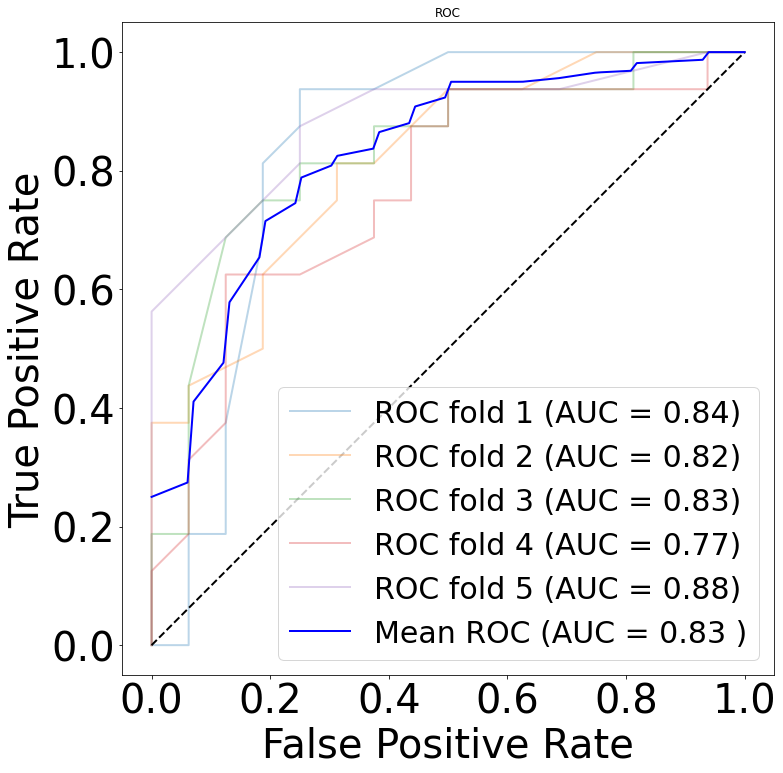

Would you like to save auroc plot for 5 fold cross-validation? (y/n) 
y
Please enter filename to save with... add .png at the end. 
union_BLCA_AUROC.png
union_BLCA_AUROC.png saved to current working directory.


In [48]:
# Get AUROC image
blca_union_auroc = cv_roc_plot(union_RF, 5, X, Y)